# Data Understanding: Titanic Machine Learning from Disaster

## Overview

This notebook focuses on the **Data Understanding** phase of the CRISP-DM methodology for the Titanic survival prediction challenge. Building on our business understanding, we will thoroughly explore the available data to gain insights that will inform our data preparation and modeling strategies.

## Objectives

**Primary Goals:**
1. **Data Quality Assessment** - Identify missing values, outliers, and data inconsistencies
2. **Exploratory Data Analysis** - Understand feature distributions and relationships with survival
3. **Feature Relationships** - Analyze correlations and interactions between variables
4. **Data Validation** - Verify assumptions from business understanding phase

**Key Questions to Answer:**
- What is the extent and pattern of missing data?
- Which features show strong relationships with survival?
- Are there outliers or data quality issues?
- What insights can guide feature engineering?

---
**CRISP-DM Phase 2 of 6** | **Previous:** [Business Understanding](01_business_understanding.ipynb) | **Next:** Data Preparation

## 1. Data Collection & Initial Setup

In [1]:
# Standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats

# Configuration
warnings.filterwarnings('ignore')
plt.style.use('default')
sns.set_palette("husl")

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)

print("📚 Libraries imported successfully!")
print("🎯 Ready for data understanding analysis")

📚 Libraries imported successfully!
🎯 Ready for data understanding analysis


In [2]:
# Load datasets
train_df = pd.read_csv('../data/raw/train.csv')
test_df = pd.read_csv('../data/raw/test.csv')
gender_submission = pd.read_csv('../data/raw/gender_submission.csv')

# Create combined dataset for comprehensive analysis
test_df['Survived'] = np.nan  # Add target column to test set
combined_df = pd.concat([train_df, test_df], ignore_index=True, sort=False)

print("📊 DATASET SUMMARY")
print("=" * 60)
print(f"Training set:     {train_df.shape[0]:,} rows × {train_df.shape[1]} columns")
print(f"Test set:         {test_df.shape[0]:,} rows × {test_df.shape[1]-1} columns (+ Survived=NaN)")
print(f"Combined:         {combined_df.shape[0]:,} rows × {combined_df.shape[1]} columns")
print(f"Sample submission: {gender_submission.shape[0]:,} rows × {gender_submission.shape[1]} columns")

print(f"\n🎯 TARGET VARIABLE (Training Set)")
print("=" * 60)
survival_stats = train_df['Survived'].describe()
print(f"Survival rate: {train_df['Survived'].mean():.1%}")
print(f"Survivors: {train_df['Survived'].sum():,}")
print(f"Non-survivors: {(train_df['Survived'] == 0).sum():,}")
print(f"Missing values: {train_df['Survived'].isna().sum()}")

📊 DATASET SUMMARY
Training set:     891 rows × 12 columns
Test set:         418 rows × 11 columns (+ Survived=NaN)
Combined:         1,309 rows × 12 columns
Sample submission: 418 rows × 2 columns

🎯 TARGET VARIABLE (Training Set)
Survival rate: 38.4%
Survivors: 342
Non-survivors: 549
Missing values: 0


In [3]:
# Display dataset structure and feature overview
print("📋 FEATURE OVERVIEW (Training Set)")
print("=" * 60)
print(train_df.info())

print(f"\n📏 FIRST 5 ROWS (Training Set)")
print("=" * 60)
display(train_df.head())

print(f"\n📈 STATISTICAL SUMMARY (Numerical Features)")
print("=" * 60)
display(train_df.describe())

📋 FEATURE OVERVIEW (Training Set)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

📏 FIRST 5 ROWS (Training Set)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



📈 STATISTICAL SUMMARY (Numerical Features)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 2. Data Quality Assessment

🔍 MISSING VALUES ANALYSIS - Training Set
Found 3 columns with missing values:


,Column,Missing_Count,Missing_Percentage,Data_Type
Cabin,Cabin,687,77.104377,object
Age,Age,177,19.865320,float64
Embarked,Embarked,2,0.224467,object


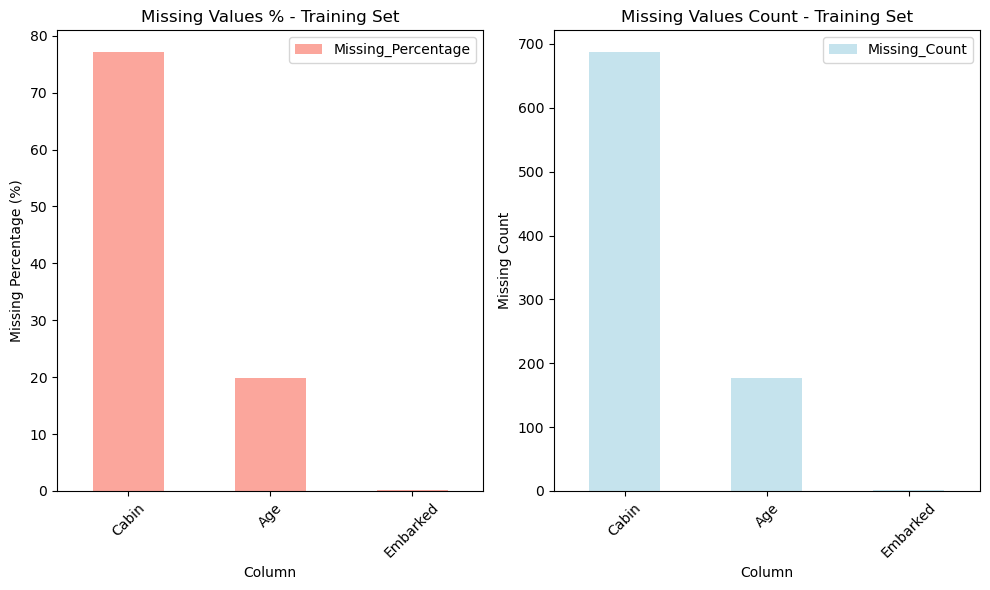



🔍 MISSING VALUES ANALYSIS - Test Set
Found 3 columns with missing values:


,Column,Missing_Count,Missing_Percentage,Data_Type
Cabin,Cabin,327,78.229665,object
Age,Age,86,20.574163,float64
Fare,Fare,1,0.239234,float64


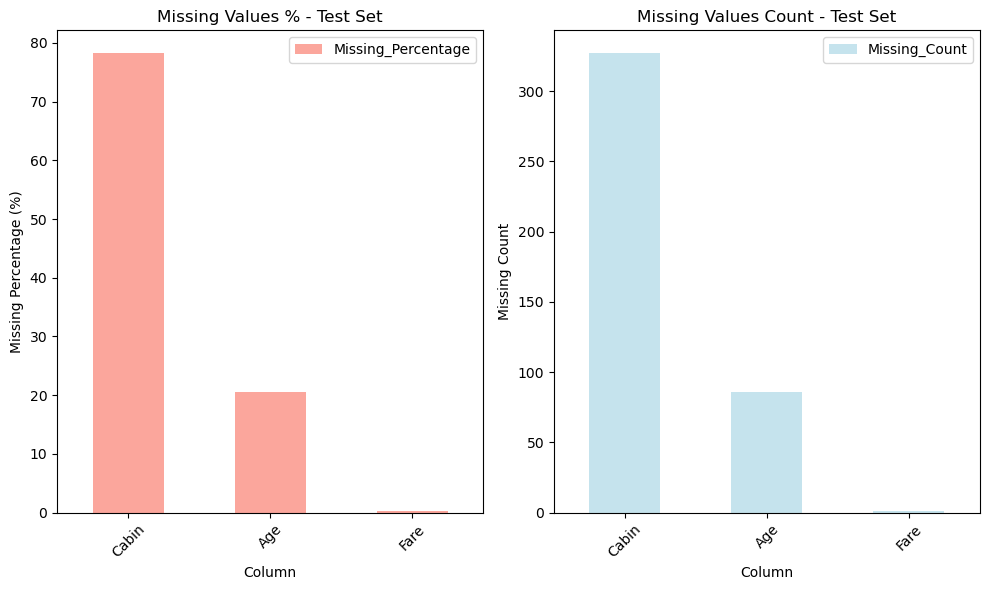

In [4]:
# Missing value analysis
def analyze_missing_values(df, dataset_name):
    """Comprehensive missing value analysis"""
    print(f"🔍 MISSING VALUES ANALYSIS - {dataset_name}")
    print("=" * 60)
    
    missing_data = pd.DataFrame({
        'Column': df.columns,
        'Missing_Count': df.isnull().sum(),
        'Missing_Percentage': (df.isnull().sum() / len(df)) * 100,
        'Data_Type': df.dtypes
    })
    
    # Filter only columns with missing values
    missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values(
        'Missing_Percentage', ascending=False
    )
    
    if len(missing_data) > 0:
        print(f"Found {len(missing_data)} columns with missing values:")
        display(missing_data)
        
        # Visual representation
        if len(missing_data) > 0:
            plt.figure(figsize=(10, 6))
            plt.subplot(1, 2, 1)
            missing_data.plot(x='Column', y='Missing_Percentage', kind='bar', 
                            color='salmon', alpha=0.7, ax=plt.gca())
            plt.title(f'Missing Values % - {dataset_name}')
            plt.ylabel('Missing Percentage (%)')
            plt.xticks(rotation=45)
            plt.tight_layout()
            
            plt.subplot(1, 2, 2)
            missing_data.plot(x='Column', y='Missing_Count', kind='bar', 
                            color='lightblue', alpha=0.7, ax=plt.gca())
            plt.title(f'Missing Values Count - {dataset_name}')
            plt.ylabel('Missing Count')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
    else:
        print("✅ No missing values found!")
    
    return missing_data

# Analyze both datasets
train_missing = analyze_missing_values(train_df, "Training Set")
print("\n")
test_missing = analyze_missing_values(test_df.drop('Survived', axis=1), "Test Set")

In [5]:
# Check for duplicate records
print("🔄 DUPLICATE RECORDS ANALYSIS")
print("=" * 60)

# Check for complete duplicates
train_duplicates = train_df.duplicated().sum()
test_duplicates = test_df.drop('Survived', axis=1).duplicated().sum()

print(f"Training set duplicate rows: {train_duplicates}")
print(f"Test set duplicate rows: {test_duplicates}")

# Check for duplicate PassengerIds
train_duplicate_ids = train_df['PassengerId'].duplicated().sum()
test_duplicate_ids = test_df['PassengerId'].duplicated().sum()

print(f"Training set duplicate PassengerIds: {train_duplicate_ids}")
print(f"Test set duplicate PassengerIds: {test_duplicate_ids}")

# Data consistency checks
print(f"\n✅ DATA CONSISTENCY CHECKS")
print("=" * 60)

# Check PassengerId ranges
print(f"Training PassengerId range: {train_df['PassengerId'].min()} - {train_df['PassengerId'].max()}")
print(f"Test PassengerId range: {test_df['PassengerId'].min()} - {test_df['PassengerId'].max()}")

# Check for overlapping PassengerIds
overlap = set(train_df['PassengerId']).intersection(set(test_df['PassengerId']))
print(f"Overlapping PassengerIds between train/test: {len(overlap)}")

# Age consistency
print(f"Age range (training): {train_df['Age'].min():.1f} - {train_df['Age'].max():.1f} years")
print(f"Age range (test): {test_df['Age'].min():.1f} - {test_df['Age'].max():.1f} years")

# Fare consistency
print(f"Fare range (training): ${train_df['Fare'].min():.2f} - ${train_df['Fare'].max():.2f}")
print(f"Fare range (test): ${test_df['Fare'].min():.2f} - ${test_df['Fare'].max():.2f}")

🔄 DUPLICATE RECORDS ANALYSIS
Training set duplicate rows: 0
Test set duplicate rows: 0
Training set duplicate PassengerIds: 0
Test set duplicate PassengerIds: 0

✅ DATA CONSISTENCY CHECKS
Training PassengerId range: 1 - 891
Test PassengerId range: 892 - 1309
Overlapping PassengerIds between train/test: 0
Age range (training): 0.4 - 80.0 years
Age range (test): 0.2 - 76.0 years
Fare range (training): $0.00 - $512.33
Fare range (test): $0.00 - $512.33


## 3. Exploratory Data Analysis (EDA)

🎯 TARGET VARIABLE ANALYSIS


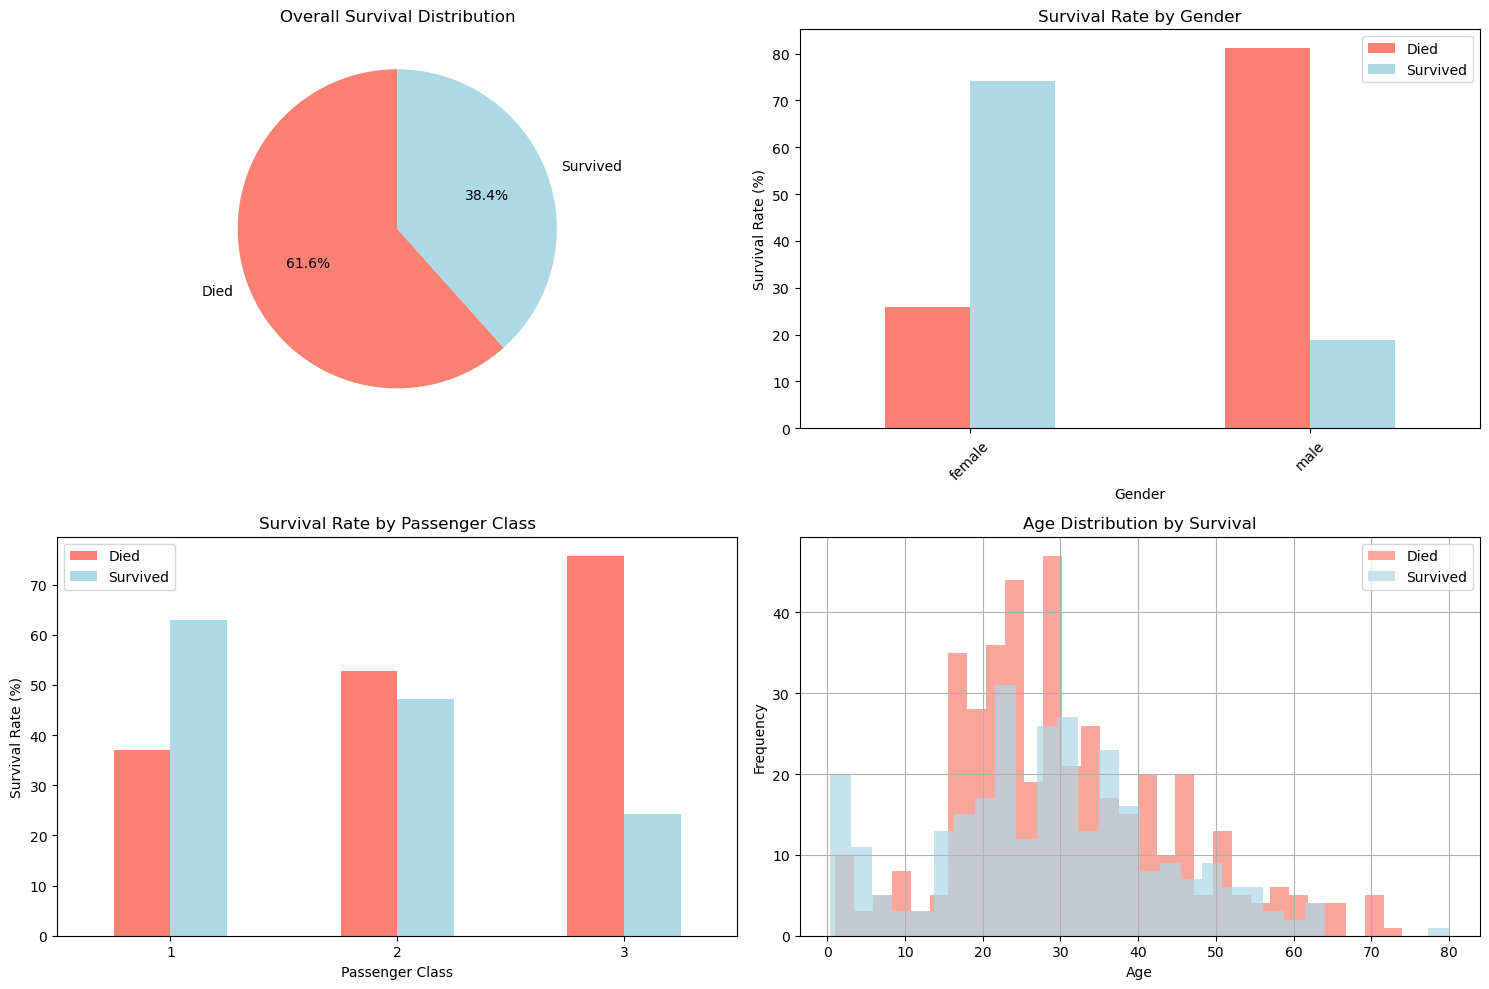


Survival Statistics:
Overall survival rate: 38.4%
Female survival rate: 74.2%
Male survival rate: 18.9%
Class 1 survival rate: 63.0%
Class 2 survival rate: 47.3%
Class 3 survival rate: 24.2%


In [7]:
# Target variable analysis
print("🎯 TARGET VARIABLE ANALYSIS")
print("=" * 60)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Survival distribution
survival_counts = train_df['Survived'].value_counts()
survival_labels = ['Died', 'Survived']

axes[0, 0].pie(survival_counts.values, labels=survival_labels, autopct='%1.1f%%', 
               colors=['salmon', 'lightblue'], startangle=90)
axes[0, 0].set_title('Overall Survival Distribution')

# Survival by gender
survival_by_gender = pd.crosstab(train_df['Sex'], train_df['Survived'], margins=True)
survival_by_gender_pct = pd.crosstab(train_df['Sex'], train_df['Survived'], normalize='index') * 100

survival_by_gender_pct.plot(kind='bar', ax=axes[0, 1], color=['salmon', 'lightblue'])
axes[0, 1].set_title('Survival Rate by Gender')
axes[0, 1].set_ylabel('Survival Rate (%)')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].legend(['Died', 'Survived'])
axes[0, 1].tick_params(axis='x', rotation=45)

# Survival by passenger class
survival_by_class = pd.crosstab(train_df['Pclass'], train_df['Survived'], normalize='index') * 100
survival_by_class.plot(kind='bar', ax=axes[1, 0], color=['salmon', 'lightblue'])
axes[1, 0].set_title('Survival Rate by Passenger Class')
axes[1, 0].set_ylabel('Survival Rate (%)')
axes[1, 0].set_xlabel('Passenger Class')
axes[1, 0].legend(['Died', 'Survived'])
axes[1, 0].tick_params(axis='x', rotation=0)

# Age distribution by survival
train_df[train_df['Survived'] == 0]['Age'].hist(alpha=0.7, bins=30, label='Died', 
                                                color='salmon', ax=axes[1, 1])
train_df[train_df['Survived'] == 1]['Age'].hist(alpha=0.7, bins=30, label='Survived', 
                                                color='lightblue', ax=axes[1, 1])
axes[1, 1].set_title('Age Distribution by Survival')
axes[1, 1].set_xlabel('Age')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

# Print survival statistics
print(f"\nSurvival Statistics:")
print(f"Overall survival rate: {train_df['Survived'].mean():.1%}")
print(f"Female survival rate: {train_df[train_df['Sex'] == 'female']['Survived'].mean():.1%}")
print(f"Male survival rate: {train_df[train_df['Sex'] == 'male']['Survived'].mean():.1%}")
print(f"Class 1 survival rate: {train_df[train_df['Pclass'] == 1]['Survived'].mean():.1%}")
print(f"Class 2 survival rate: {train_df[train_df['Pclass'] == 2]['Survived'].mean():.1%}")
print(f"Class 3 survival rate: {train_df[train_df['Pclass'] == 3]['Survived'].mean():.1%}")

📊 CATEGORICAL FEATURES ANALYSIS


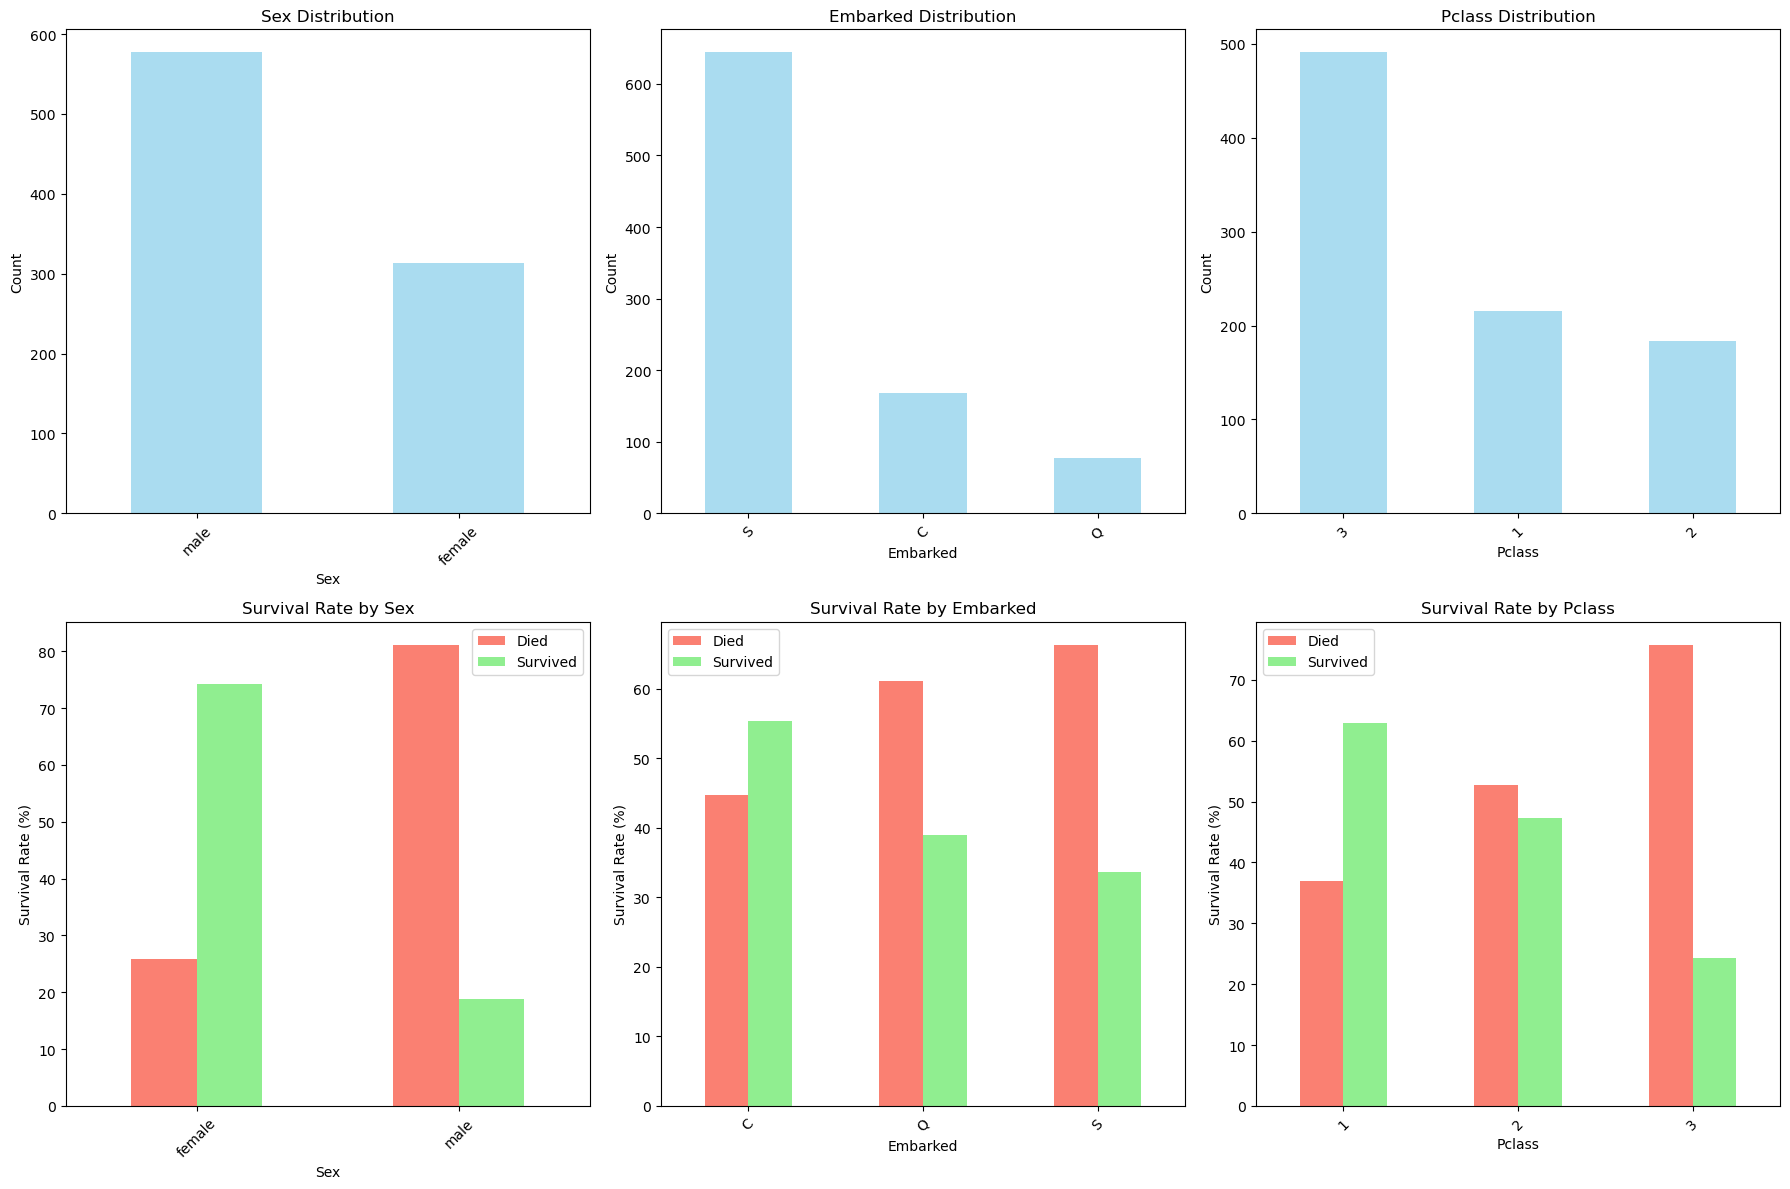


Sex Analysis:
----------------------------------------
  male: 577 (64.8%) - Survival: 18.9%
  female: 314 (35.2%) - Survival: 74.2%

Embarked Analysis:
----------------------------------------
  S: 644 (72.4%) - Survival: 33.7%
  C: 168 (18.9%) - Survival: 55.4%
  Q: 77 (8.7%) - Survival: 39.0%
  Missing values: 2 (0.2%)

Pclass Analysis:
----------------------------------------
  3: 491 (55.1%) - Survival: 24.2%
  1: 216 (24.2%) - Survival: 63.0%
  2: 184 (20.7%) - Survival: 47.3%


In [8]:
# Categorical features analysis
categorical_features = ['Sex', 'Embarked', 'Pclass']

print("📊 CATEGORICAL FEATURES ANALYSIS")
print("=" * 60)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, feature in enumerate(categorical_features):
    # Distribution
    train_df[feature].value_counts().plot(kind='bar', ax=axes[i], color='skyblue', alpha=0.7)
    axes[i].set_title(f'{feature} Distribution')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)
    
    # Survival rate by category
    survival_by_cat = pd.crosstab(train_df[feature], train_df['Survived'], normalize='index') * 100
    survival_by_cat.plot(kind='bar', ax=axes[i+3], color=['salmon', 'lightgreen'])
    axes[i+3].set_title(f'Survival Rate by {feature}')
    axes[i+3].set_ylabel('Survival Rate (%)')
    axes[i+3].legend(['Died', 'Survived'])
    axes[i+3].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Print detailed categorical statistics
for feature in categorical_features:
    print(f"\n{feature} Analysis:")
    print("-" * 40)
    
    # Value counts
    counts = train_df[feature].value_counts()
    percentages = train_df[feature].value_counts(normalize=True) * 100
    
    for value in counts.index:
        survival_rate = train_df[train_df[feature] == value]['Survived'].mean() * 100
        print(f"  {value}: {counts[value]} ({percentages[value]:.1f}%) - Survival: {survival_rate:.1f}%")
    
    # Missing values
    missing = train_df[feature].isna().sum()
    if missing > 0:
        print(f"  Missing values: {missing} ({missing/len(train_df)*100:.1f}%)")

📈 NUMERICAL FEATURES ANALYSIS


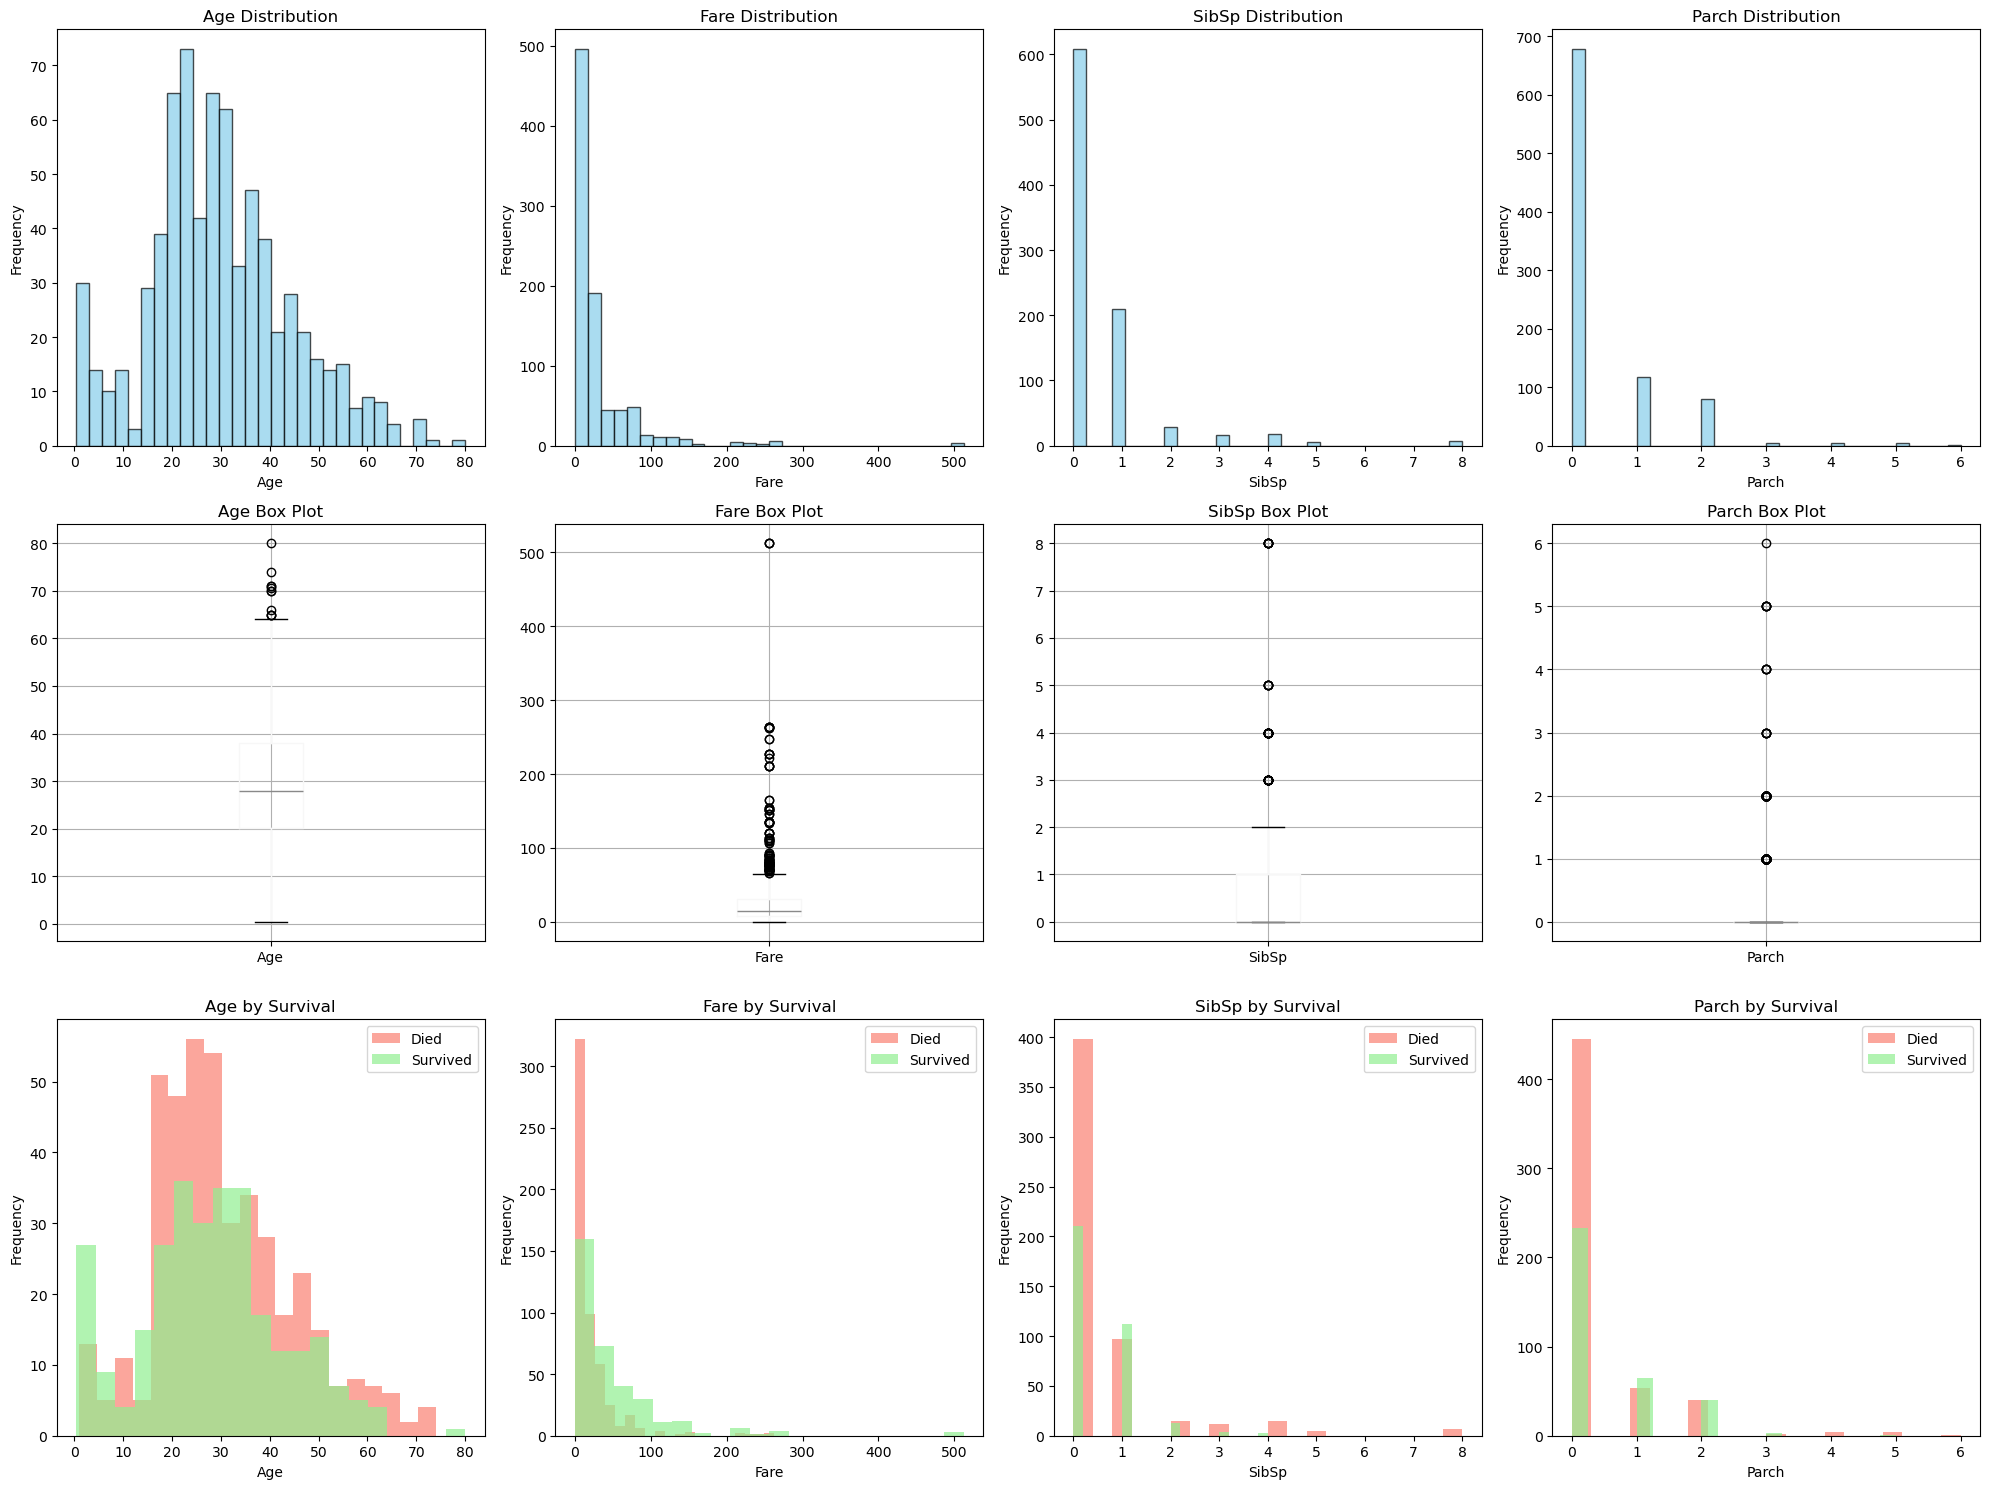


Numerical Features by Survival Status:

Age:
------------------------------


,Survived,Died,Difference
count,290.000000,424.000000,-134.000000
mean,28.343690,30.626179,-2.282490
std,14.950952,14.172110,0.778842
min,0.420000,1.000000,-0.580000
25%,19.000000,21.000000,-2.000000
50%,28.000000,28.000000,0.000000
75%,36.000000,39.000000,-3.000000
max,80.000000,74.000000,6.000000


Correlation with Survival: -0.077

Fare:
------------------------------


,Survived,Died,Difference
count,342.000000,549.000000,-207.000000
mean,48.395408,22.117887,26.277521
std,66.596998,31.388207,35.208792
min,0.000000,0.000000,0.000000
25%,12.475000,7.854200,4.620800
50%,26.000000,10.500000,15.500000
75%,57.000000,26.000000,31.000000
max,512.329200,263.000000,249.329200


Correlation with Survival: 0.257

SibSp:
------------------------------


,Survived,Died,Difference
count,342.000000,549.000000,-207.000000
mean,0.473684,0.553734,-0.080050
std,0.708688,1.288399,-0.579712
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000
max,4.000000,8.000000,-4.000000


Correlation with Survival: -0.035

Parch:
------------------------------


,Survived,Died,Difference
count,342.000000,549.000000,-207.000000
mean,0.464912,0.329690,0.135222
std,0.771712,0.823166,-0.051454
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000
max,5.000000,6.000000,-1.000000


Correlation with Survival: 0.082

🔗 CORRELATION MATRIX


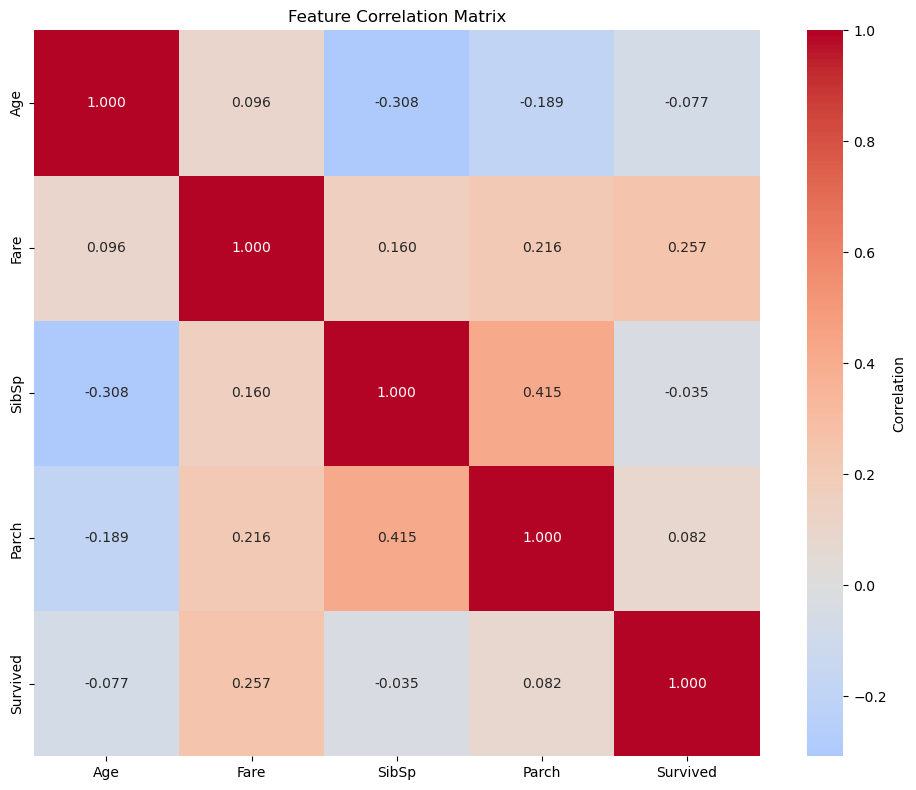

In [9]:
# Numerical features analysis
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']

print("📈 NUMERICAL FEATURES ANALYSIS")
print("=" * 60)

fig, axes = plt.subplots(3, 4, figsize=(20, 15))

for i, feature in enumerate(numerical_features):
    # Distribution
    axes[0, i].hist(train_df[feature].dropna(), bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0, i].set_title(f'{feature} Distribution')
    axes[0, i].set_ylabel('Frequency')
    axes[0, i].set_xlabel(feature)
    
    # Box plot
    train_df.boxplot(column=feature, ax=axes[1, i])
    axes[1, i].set_title(f'{feature} Box Plot')
    
    # Survival comparison
    survived_data = train_df[train_df['Survived'] == 1][feature].dropna()
    died_data = train_df[train_df['Survived'] == 0][feature].dropna()
    
    axes[2, i].hist(died_data, alpha=0.7, label='Died', color='salmon', bins=20)
    axes[2, i].hist(survived_data, alpha=0.7, label='Survived', color='lightgreen', bins=20)
    axes[2, i].set_title(f'{feature} by Survival')
    axes[2, i].set_xlabel(feature)
    axes[2, i].set_ylabel('Frequency')
    axes[2, i].legend()

plt.tight_layout()
plt.show()

# Statistical summary by survival status
print("\nNumerical Features by Survival Status:")
print("=" * 60)

for feature in numerical_features:
    print(f"\n{feature}:")
    print("-" * 30)
    
    survived_stats = train_df[train_df['Survived'] == 1][feature].describe()
    died_stats = train_df[train_df['Survived'] == 0][feature].describe()
    
    comparison_df = pd.DataFrame({
        'Survived': survived_stats,
        'Died': died_stats,
        'Difference': survived_stats - died_stats
    })
    
    display(comparison_df)
    
    # Correlation with survival
    correlation = train_df[feature].corr(train_df['Survived'])
    print(f"Correlation with Survival: {correlation:.3f}")

# Overall correlation matrix
print("\n🔗 CORRELATION MATRIX")
print("=" * 60)

correlation_matrix = train_df[numerical_features + ['Survived']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.3f', cbar_kws={'label': 'Correlation'})
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

🔗 FEATURE RELATIONSHIPS & INTERACTIONS


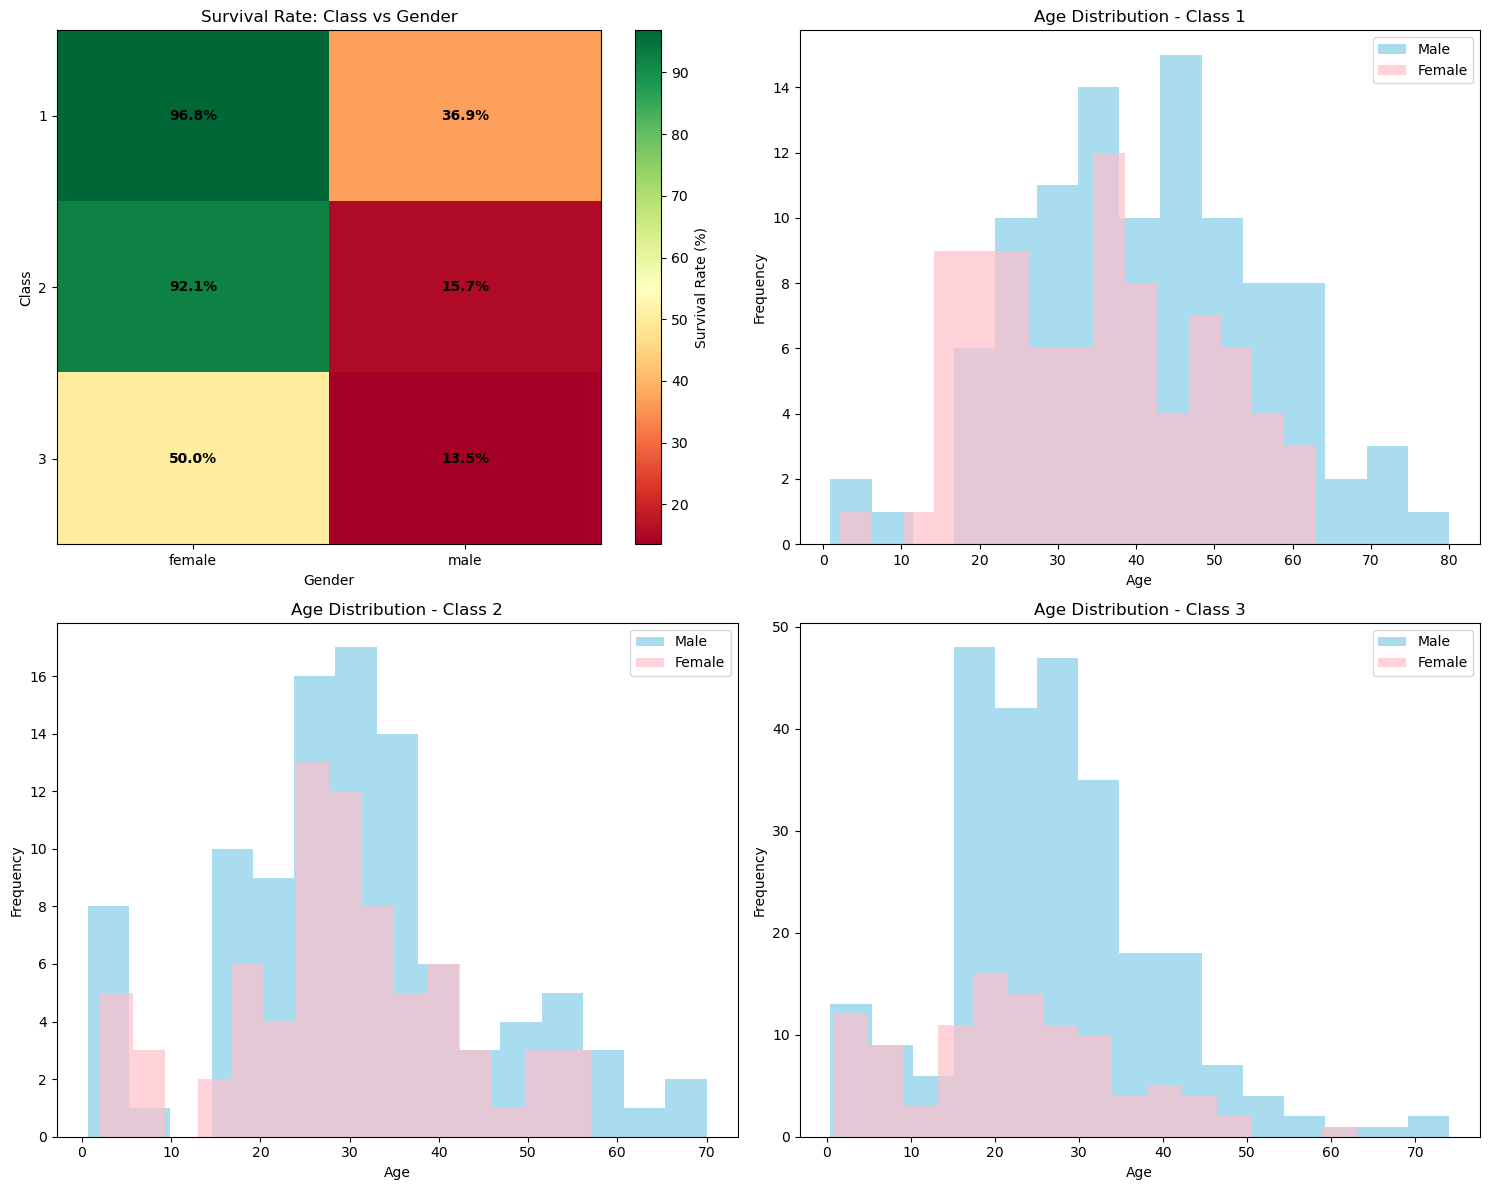


Family Size Analysis:
----------------------------------------
            Count  Survival_Rate
FamilySize                      
1             537          0.304
2             161          0.553
3             102          0.578
4              29          0.724
5              15          0.200
6              22          0.136
7              12          0.333
8               6          0.000
11              7          0.000


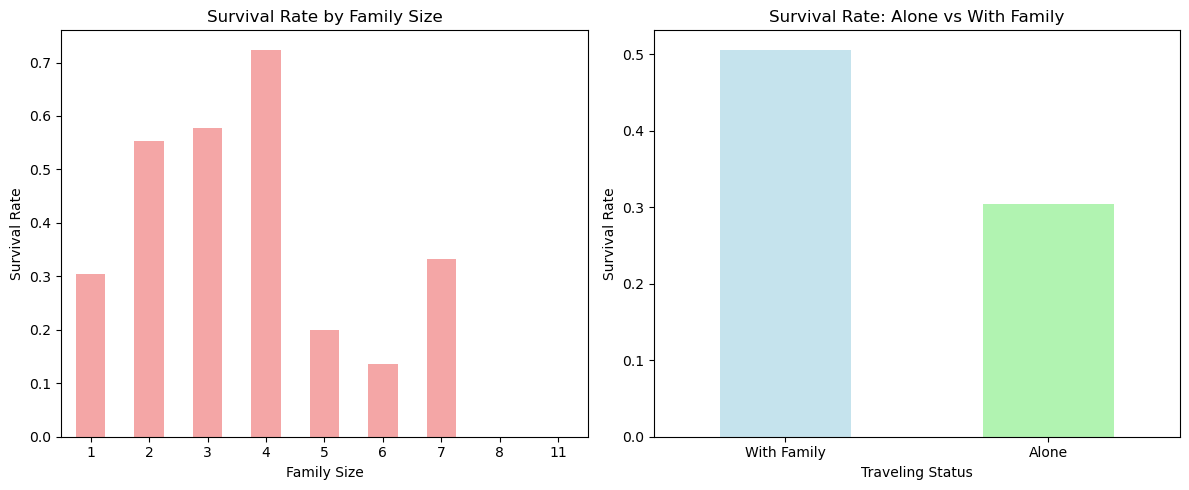


Survival rate - Traveling alone: 30.4%
Survival rate - With family: 50.6%


In [10]:
# Feature relationships and interactions
print("🔗 FEATURE RELATIONSHIPS & INTERACTIONS")
print("=" * 60)

# Class and Gender interaction
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Class vs Gender survival heatmap
class_gender_survival = pd.crosstab([train_df['Pclass'], train_df['Sex']], 
                                   train_df['Survived'], normalize='index') * 100
class_gender_survival = class_gender_survival[1].unstack()  # Get survival rate

im1 = axes[0, 0].imshow(class_gender_survival.values, cmap='RdYlGn', aspect='auto')
axes[0, 0].set_xticks(range(len(class_gender_survival.columns)))
axes[0, 0].set_xticklabels(class_gender_survival.columns)
axes[0, 0].set_yticks(range(len(class_gender_survival.index)))
axes[0, 0].set_yticklabels(class_gender_survival.index)
axes[0, 0].set_title('Survival Rate: Class vs Gender')
axes[0, 0].set_xlabel('Gender')
axes[0, 0].set_ylabel('Class')

# Add text annotations
for i in range(len(class_gender_survival.index)):
    for j in range(len(class_gender_survival.columns)):
        text = axes[0, 0].text(j, i, f'{class_gender_survival.iloc[i, j]:.1f}%',
                              ha="center", va="center", color="black", fontweight='bold')

plt.colorbar(im1, ax=axes[0, 0], label='Survival Rate (%)')

# Age distribution by class and gender
for i, pclass in enumerate([1, 2, 3]):
    class_data = train_df[train_df['Pclass'] == pclass]
    
    if i == 0:
        ax = axes[0, 1]
    elif i == 1:
        ax = axes[1, 0]
    else:
        ax = axes[1, 1]
    
    # Age distribution by gender for each class
    male_ages = class_data[class_data['Sex'] == 'male']['Age'].dropna()
    female_ages = class_data[class_data['Sex'] == 'female']['Age'].dropna()
    
    ax.hist(male_ages, alpha=0.7, label='Male', color='skyblue', bins=15)
    ax.hist(female_ages, alpha=0.7, label='Female', color='pink', bins=15)
    ax.set_title(f'Age Distribution - Class {pclass}')
    ax.set_xlabel('Age')
    ax.set_ylabel('Frequency')
    ax.legend()

plt.tight_layout()
plt.show()

# Family size analysis
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
train_df['IsAlone'] = (train_df['FamilySize'] == 1).astype(int)

print("\nFamily Size Analysis:")
print("-" * 40)

family_survival = train_df.groupby('FamilySize')['Survived'].agg(['count', 'mean']).round(3)
family_survival.columns = ['Count', 'Survival_Rate']
print(family_survival)

# Family size vs survival visualization
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
family_survival['Survival_Rate'].plot(kind='bar', color='lightcoral', alpha=0.7)
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
alone_survival = train_df.groupby('IsAlone')['Survived'].mean()
alone_survival.plot(kind='bar', color=['lightblue', 'lightgreen'], alpha=0.7)
plt.title('Survival Rate: Alone vs With Family')
plt.xlabel('Traveling Status')
plt.ylabel('Survival Rate')
plt.xticks([0, 1], ['With Family', 'Alone'], rotation=0)

plt.tight_layout()
plt.show()

print(f"\nSurvival rate - Traveling alone: {train_df[train_df['IsAlone'] == 1]['Survived'].mean():.1%}")
print(f"Survival rate - With family: {train_df[train_df['IsAlone'] == 0]['Survived'].mean():.1%}")

## 4. Data Understanding Summary & Insights

### 🔍 Key Findings from Data Understanding

Based on our comprehensive analysis of the Titanic dataset, we have uncovered several critical insights that will guide our feature engineering and modeling approach:

#### **📊 Data Quality Assessment**
- **Missing Values**: 
  - **Training Set**: Cabin (77.1%), Age (19.9%), Embarked (0.2%)
  - **Test Set**: Cabin (78.2%), Age (20.6%), Fare (0.2%)
- **Data Integrity**: No duplicate records, consistent PassengerId ranges (train: 1-891, test: 892-1309)
- **Data Consistency**: Age ranges 0.4-80 years (train) and 0.2-76 years (test), Fare ranges $0-$512.33

#### **🎯 Target Variable Patterns**
- **Overall Survival Rate**: 38.4% (342/891 passengers survived)
- **Strong Gender Bias**: 
  - **Female survival: 74.2%** (233/314 survived)
  - **Male survival: 18.9%** (109/577 survived)
  - **Women ~4x more likely to survive than men**

#### **🏷️ Categorical Feature Insights**
- **Passenger Class Hierarchy**:
  - **1st Class: 63.0% survival** (136/216)
  - **2nd Class: 47.3% survival** (87/184) 
  - **3rd Class: 24.2% survival** (119/491)
  - **Clear socioeconomic survival advantage**

- **Embarkation Port Patterns**:
  - **Southampton (S)**: 72.4% of passengers, 33.7% survival
  - **Cherbourg (C)**: 18.9% of passengers, **55.4% survival** (premium port)
  - **Queenstown (Q)**: 8.7% of passengers, 39.0% survival

#### **📈 Numerical Feature Correlations with Survival**
- **Fare**: **Strong positive correlation (0.257)**
  - Survivors had mean fare of $48.40 vs $22.12 for non-survivors
  - Median fare: $26.00 (survived) vs $10.50 (died)
  - **Higher fares = better survival odds**
  
- **Age**: Weak negative correlation (-0.077)
  - Survivors slightly younger: mean 28.3 vs 30.6 years
  - Both groups similar age distributions
  
- **Family Variables**: Very weak correlations
  - **SibSp**: -0.035 (siblings/spouses)
  - **Parch**: +0.082 (parents/children)

#### **🔗 Critical Feature Interactions**
- **Class × Gender**: **Most powerful predictor combination**
  - **1st Class Women: 96.8% survival** (best group)
  - **2nd Class Women: 92.1% survival**
  - **3rd Class Women: 50.0% survival**
  - **1st Class Men: 36.9% survival**
  - **2nd Class Men: 15.7% survival**
  - **3rd Class Men: 13.5% survival** (worst group)
  - **83-point survival gap between best and worst**

- **Family Size Sweet Spot**:
  - **Solo travelers (size=1): 30.4% survival** (537 people)
  - **Small families (size=2-3): 55-58% survival**
  - **Medium families (size=4): 72.4% survival** (optimal)
  - **Large families (size=5+): 0-33% survival** (logistics challenges)
  - **Traveling with family: 50.6% vs alone: 30.4%**

#### **⚠️ Data Quality Priorities**
- **Cabin**: 77-78% missing - deck/location information lost
- **Age**: ~20% missing - critical for age-based survival patterns
- **Embarked**: 2 missing (train) - easy mode imputation
- **Fare**: 1 missing (test) - can impute from class/embarkation

#### **🎯 Validated Modeling Insights**
1. **Gender dominates prediction** - confirmed 74% vs 19% baseline from business understanding
2. **Class amplifies gender effects** - clear hierarchy within each gender
3. **Fare encodes class information** - correlation 0.257 with survival
4. **Family size has optimal range** - not linear relationship
5. **Age has minimal direct impact** - but may interact with gender ("children first")

#### **🚀 Feature Engineering Roadmap**
- **Categorical bins**: Family size (Alone/Small/Medium/Large), Age groups, Fare quartiles
- **Title extraction**: Mr./Mrs./Miss/Master from Name column
- **Deck extraction**: A-G from Cabin where available
- **Interaction terms**: Class×Gender, Age×Gender critical
- **Missing value strategy**: Age by class/gender median, Cabin deck indicators

### 🚀 Next Steps: Data Preparation Phase

Based on our actual data analysis results, the next phase will focus on:

#### **1. Missing Value Treatment (Priority Order)**
- **Age (19.9% train, 20.6% test)**: Impute using median by passenger class and gender groups
- **Cabin (77-78% missing)**: Extract deck letters (A-G) where available, create "Unknown" indicator
- **Embarked (2 missing)**: Mode imputation (Southampton is dominant at 72.4%)
- **Fare (1 missing in test)**: Impute using median for same class and embarkation port

#### **2. Feature Engineering (Data-Driven)**
- **Family Size Categories**: 
  - Alone (size=1, 30.4% survival)
  - Small (size=2-3, 55-58% survival) 
  - Optimal (size=4, 72.4% survival)
  - Large (size=5+, poor survival)
- **Age Groups**: Child (<16), Adult (16-60), Elderly (60+) based on survival patterns
- **Fare Quartiles**: Based on observed distributions and class relationships
- **Title Extraction**: Mr./Mrs./Miss/Master/Dr./Rev from Name (social status indicator)
- **Deck Categories**: A-G from Cabin, Unknown indicator for missing

#### **3. Categorical Encoding Strategy**
- **Gender**: Binary (Female=1 for survival advantage)
- **Class**: Keep ordinal (1,2,3) - clear hierarchy confirmed
- **Embarked**: One-hot or ordinal based on survival rates (C>Q>S)
- **New Categories**: Ordinal encoding for family size, age groups

#### **4. Feature Scaling & Transformation**
- **Numerical features**: StandardScaler for Age, Fare (right-skewed)
- **Log transformation**: Consider for Fare due to extreme outliers (max $512)
- **Interaction terms**: Class×Gender (83-point survival difference), Age×Gender

#### **5. Feature Selection Priorities**
- **Core predictors**: Gender, Class, Fare (correlations: N/A, N/A, 0.257)
- **Interaction terms**: Class×Gender combinations (96.8% vs 13.5% survival range)
- **Family features**: Optimized family size categories
- **Secondary**: Age groups, Embarked, Deck information
- **Remove**: Individual SibSp/Parch (weak correlations: -0.035, 0.082)

#### **✅ Data Understanding Insights Confirmed**
- **Gender is the dominant predictor** (74.2% vs 18.9% survival)
- **Class amplifies gender effects** (Class×Gender interaction critical)
- **Family size has optimal range** (size=4 best at 72.4%)
- **Fare strongly correlates with survival** (0.257) and class
- **Age has minimal direct impact** (-0.077 correlation) but may interact with gender
- **Missing data patterns are manageable** with targeted imputation strategies